In [1]:
import ta
import yfinance as yf
import pandas as pd
import numpy as np
import datetime

In [2]:
# Set the end date to today
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

# Calculate the start date as one year ago from today
start_date = (datetime.datetime.today() - datetime.timedelta(days=365)).strftime('%Y-%m-%d')


data = yf.download('TCS.NS', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Download data for TCS for the last year
#data = yf.download('TCS.NS', start=start_date, end=end_date)

In [4]:
data['EMA9'] = data['Close'].ewm(span=9, adjust=False).mean()
data['EMA20'] = data['Close'].ewm(span=20, adjust=False).mean()
data['EMA50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA100'] = data['Close'].ewm(span=100, adjust=False).mean()
data['EMA200'] = data['Close'].ewm(span=200, adjust=False).mean()

# Compute the 20 day average volume
data['VolumeAvg20'] = data['Volume'].rolling(window=20).mean()

In [5]:
data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()

In [25]:
macd = ta.trend.MACD(data['Close'], window_fast=12, window_slow=26, window_sign=9)
data['MACD'] = macd.macd()
data['MACD_signal'] = macd.macd_signal()
data['MACD Above Signal'] = data['MACD'] > data['MACD_signal']


In [ ]:
data.tail()


In [26]:
df = pd.DataFrame(data)

In [ ]:
# Assuming you have a DataFrame named 'df' with columns EMA9, EMA20, EMA50, EMA100, EMA200
# We will create two new columns 'signal' and 'positions' to keep track of buy/sell signals and positions

# Initialize the columns with zeros
df['signal'] = 0
df['positions'] = 0

# Find where the EMA9 crosses above EMA20 and set signal to 1
# This is the bullish crossover signal
df['signal'][9:] = np.where(df['EMA9'][9:] > df['EMA20'][9:], 1, 0)

# Take the difference of the signal between consecutive rows
# This will help us identify when the signal changes from 1 to 0 or 0 to 1
df['positions'] = df['signal'].diff()

# Initialize a variable to keep track of the current position
current_position = 0

# Loop through each row and execute trades based on the position
for i, row in df.iterrows():
    if row['positions'] == 1:
        # If the signal changes from 0 to 1, buy 100 shares
        current_position = 100
    elif row['positions'] == -1:
        # If the signal changes from 1 to 0, sell 100 shares
        current_position = -100
    else:
        # If there is no change in signal, hold the current position
        pass

    # Update the positions column with the current position
    df.at[i, 'positions'] = current_position

# Plot the positions column to visualize the trades
df['positions'].plot()


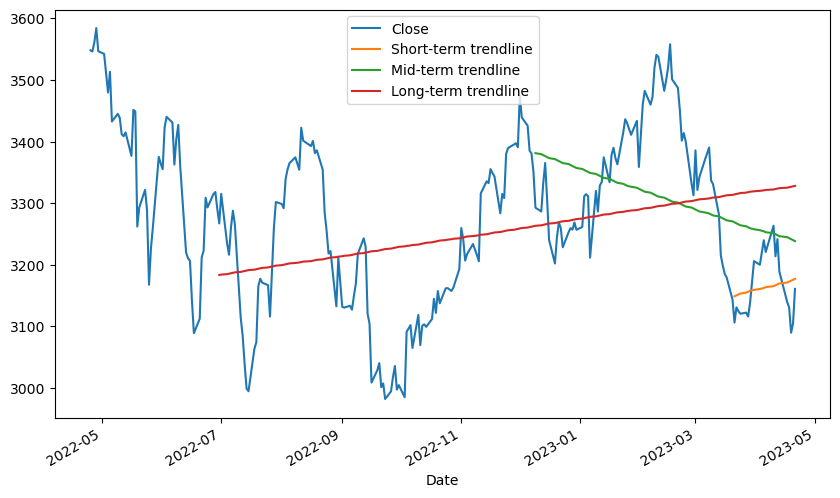

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have a pandas DataFrame named 'data' with columns 'Date' and 'Price'

# Convert the 'Date' column to a datetime object and set it as the index
#data['Date'] = pd.to_datetime(data['Date'])
#df.set_index('Date', inplace=True)

# Define a function to calculate the slope and y-intercept of a trendline
def calculate_trendline(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope * x + intercept

# Define the time periods for each trendline
short_term_period = 20
mid_term_period = 90
long_term_period = 200

# Calculate the short-term trendline using linear regression
short_term_trendline = calculate_trendline(np.arange(len(df['Close']))[-short_term_period:], df['Close'][-short_term_period:])

# Calculate the mid-term trendline using linear regression
mid_term_trendline = calculate_trendline(np.arange(len(df['Close']))[-mid_term_period:], df['Close'][-mid_term_period:])

# Calculate the long-term trendline using linear regression
long_term_trendline = calculate_trendline(np.arange(len(df['Close']))[-long_term_period:], df['Close'][-long_term_period:])

# Plot the price data and trendlines
fig, ax = plt.subplots(figsize=(10, 6))

df['Close'].plot(ax=ax, label='Close')
ax.plot(df.index[-short_term_period:], short_term_trendline, label='Short-term trendline')
ax.plot(df.index[-mid_term_period:], mid_term_trendline, label='Mid-term trendline')
ax.plot(df.index[-long_term_period:], long_term_trendline, label='Long-term trendline')

ax.legend()
plt.show()


In [35]:
ax.plot(df, list(df['EMA200']) , label='200 EMA trendline')

In [36]:
ax.legend()
plt.show()

In [27]:
data

,Open,High,Low,Close,Adj Close,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,VolumeAvg20,RSI,MACD,MACD_signal,MACD Above Signal
Date,,,,,,,,,,,,,,,,
2022-04-25,3558.000000,3584.000000,3533.100098,3548.199951,3436.494385,1960694,3548.199951,3548.199951,3548.199951,3548.199951,3548.199951,NaN,NaN,NaN,NaN,False
2022-04-26,3575.149902,3587.899902,3518.149902,3546.300049,3434.654541,1943469,3547.819971,3548.019008,3548.125445,3548.162329,3548.181047,NaN,NaN,NaN,NaN,False
2022-04-27,3546.000000,3568.449951,3506.300049,3561.199951,3449.085205,1727648,3550.495967,3549.274336,3548.638171,3548.420500,3548.310588,NaN,NaN,NaN,NaN,False
2022-04-28,3588.000000,3604.399902,3538.050049,3584.300049,3471.457764,1703660,3557.256783,3552.610118,3550.036676,3549.130986,3548.668692,NaN,NaN,NaN,NaN,False
2022-04-29,3597.000000,3623.250000,3536.850098,3546.699951,3435.041260,2051115,3555.145417,3552.047245,3549.905824,3549.082847,3548.649103,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17,3134.100098,3163.399902,3070.250000,3139.500000,3139.500000,5505048,3194.635470,3209.916038,3266.798958,3289.466070,3307.744088,2391608.05,39.591001,-27.922860,-37.421770,True
2023-04-18,3154.949951,3156.850098,3110.600098,3130.750000,3130.750000,2617302,3181.858376,3202.376415,3261.463704,3286.323177,3305.982952,2433447.05,38.779928,-31.083045,-36.154025,True
2023-04-19,3130.750000,3140.000000,3071.500000,3089.600098,3089.600098,3298034,3163.406721,3191.635813,3254.723955,3282.427671,3303.829889,2503295.75,35.134547,-36.487364,-36.220692,False


In [16]:
df.iloc[-1, :]

Open           3.110000e+03
High           3.164450e+03
Low            3.100800e+03
Close          3.160850e+03
Adj Close      3.160850e+03
Volume         1.929184e+06
EMA9           3.153518e+03
EMA20          3.181221e+03
EMA50          3.245394e+03
EMA100         3.276572e+03
EMA200         3.300447e+03
VolumeAvg20    2.269283e+06
RSI            4.530224e+01
Name: 2023-04-21 00:00:00, dtype: float64

In [17]:
last_row = df.iloc[-1, :]
last_row_df = last_row.to_frame().T

In [23]:
last_row_df["% change volume"] = ((last_row_df ["VolumeAvg20"] - last_row_df ["Volume"]) * 100) / last_row_df ["Volume"]

In [24]:
last_row_df

,Open,High,Low,Close,Adj Close,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,VolumeAvg20,RSI,% chnage volume,% change volume
2023-04-21,3110.0,3164.449951,3100.800049,3160.850098,3160.850098,1929184.0,3153.518328,3181.221394,3245.393822,3276.572467,3300.446514,2269283.2,45.302236,17.629174,17.629174
